In [1]:
# WORKING WITH UNLABELED DATA - CLUSTERING ANALYSIS
# unsupervised learning 


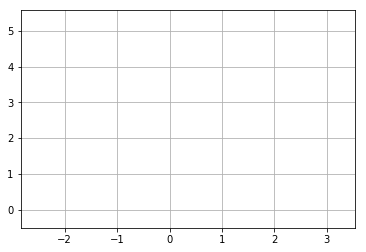

In [2]:
# GROUPING OBJECTS BY SIMILARITY USING K-MEANS 
# used for grouping of documents, music, and movies by diff topics, or finding customers that share sim
# interests  based on common purchase behaviors as a basis for recommendation engines 

# prototype; works well with spherical data types 

from sklearn.datasets import make_blobs 
x, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)


import matplotlib.pyplot as plt 
plt.scatter(x[:, 0], x[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.show()


In [3]:
# b/c no labels then use k-cluster


In [4]:
# k-means algorithm
# 1. randomly pick k centroids from the sample points as initial cluster centers 
# 2. assign each sample to the nearest centroid
# 3. move the centroids to the center of the samples that were assigned to it 
# 4. repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or a maximum number
#    of iteration is reached 



In [5]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)


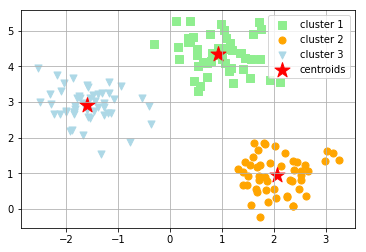

In [7]:
# K-MEANS++
# 1. Initialize an emptty set M to store the k centroids being selected 
# 2. Randomly choose the first centroid from the input samples and assign it to M 
# 3. For each sample that is not in M, find the minimum squared distance to any of the centroids in M 
# 4. To randomly select the centroid use a weighted probabilicty distr. equal to
# 5. Repeat steps 2 and 3 until k centroids are chosen 
# 6. Proceed with the classic k-means algorithm 

plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, c='lightgreen', marker='s', label='cluster 1')

plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(x[y_km==2,0], x[y_km==2,1], s=50, c='lightblue', marker='v', label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s=250, marker='*', c='red', label='centroids')

plt.legend()
plt.grid()
plt.show()

In [8]:
# hard to guess k beforehand , and hard when data may overlap


In [9]:
# HARD VERSUS SOFT CLUSTERING 
# FCM : Fuzzy C-means ~ similar te the k-means 
# 1. Specify the number of k centroids and randomly assign the cluster memberships for each point 
# 2. Compute the cluster centroids
# 3. Update the cluster memberships for each point
# 4. Repeat steps 2 and 3 until the membership coefficients do not change or a user-defined tolerance or a max
#    number of iterations is reached 




In [10]:
# USING THE ELBOW METHOD TO FIND THE OPTIMAL NUMBER OF CLUSTERS 
# check distorting to find the correct labels 

print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


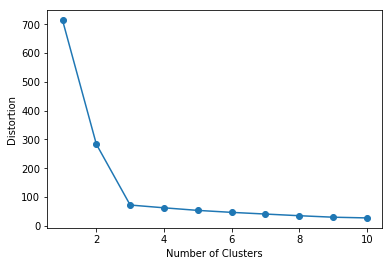

In [11]:
distortions = []
for i in range(1, 11):
    km =KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [12]:
 # => that 3 is a good choice for the dataset


In [15]:
# QUANTIFYING THE QUALITY OF CLUSTERING VIA SILHOUETTE PLOTS
# 1. Calculate the cluster cohesion as the avg distance between a sample  and ather points in the same cluster
# 2. Calculate the cluster separation from the next closet cluster as the average distance between the sample and 
#    all samples in the neares cluster
# 3. Calculate the silhoutte as te difference between cluster cohesion and separation divided by the greater of the
#    of the two


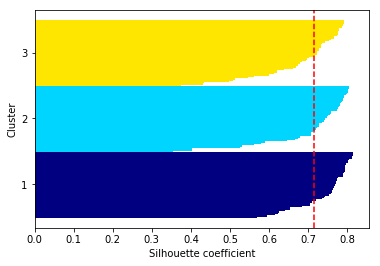

In [17]:
# using the k deduced from the last step
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

import numpy as np 
from matplotlib import cm 
from sklearn.metrics import silhouette_samples 
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

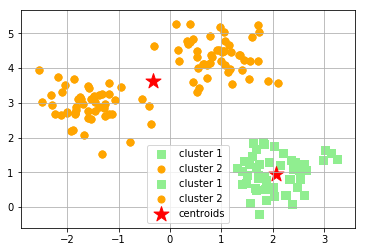

In [19]:
# because coefficients aren't close to 0 => good clustering

km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(x)
plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()


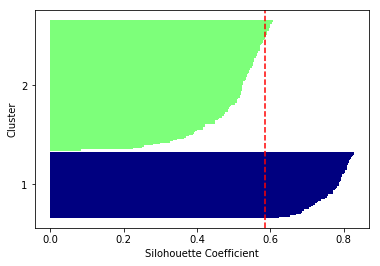

In [20]:
# usually cannot do this because of higher dimensionality of data 

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0 
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silohouette Coefficient')
plt.show()
    

In [24]:
# ORGANIZING CLUSTERS AS A HIERARCHICAL TREE
# can plot dendrograms 
# agglomerative clustering 
# 1. Compute the distance matrix of all samples 
# 2. Represent each data point as a singleton cluster
# 3. Merge the two closest clusters based on the distance of the most dissimilar distant members
# 4. Update the distance matrix
# 5. repeat steps 2 to 4 until one single cluster remains 


In [29]:
# generating random data to work with 
# rows = represent diff. observations 
# cols = diff. features 

import pandas as pd 
import numpy as np 
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
x = np.random.random_sample([5,3])*10 
df = pd.DataFrame(x, columns=variables, index=labels)
df 

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [30]:
# PERFORMING HIERARCHICAS CLUSTERING ON A DISTANCE MATRIX
# calc distance matrix

from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [32]:
from scipy.cluster.hierarchy import linkage

# condensed distance matrix
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
# sample matrix
row_clusters = linkage(df.values, method='complete', metric='euclidean')

# viewing the results 
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], index=['cluster %d'%(i+1) for i in range(row_clusters.shape[0])])



,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


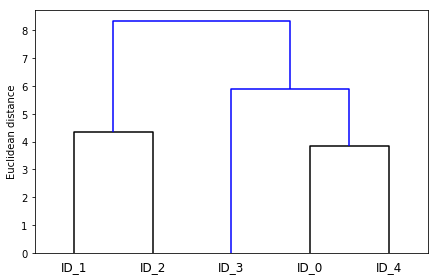

In [34]:
# dendrogram
from scipy.cluster.hierarchy import dendrogram
#
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()


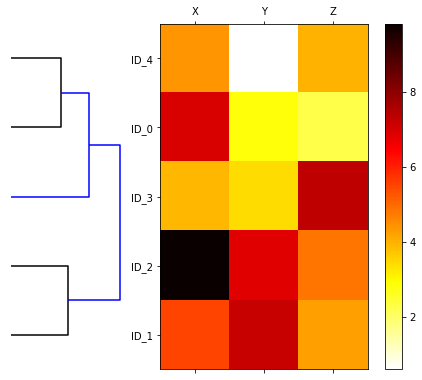

In [36]:
# ATTACHING DENDROGRAMS TO A HEAT MAP 
# create a new figure object , rotate it
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='right')

# reorder the data in out initial DataFrame
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# making a heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

# modifing aesthetics, adding the color bar
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [37]:
# APPLYING AGGLOMERATIVE CLUSTERING VIA SCIKIT LEARN 

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(x)
print('Cluster labels: %s' % labels)


Cluster labels: [0 1 1 0 0]


In [38]:
# LOCATING REGIONS OF HIGH DENSITY VIA DBSCAN
# Density-Based Spatial Clustering of Applications with Noise
# doesn't assume that the k-clusters are spherical 

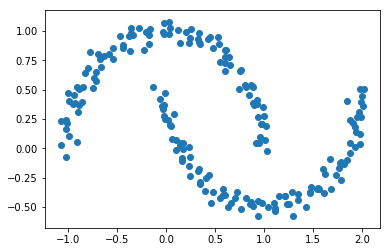

In [39]:
from sklearn.datasets import make_moons 
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

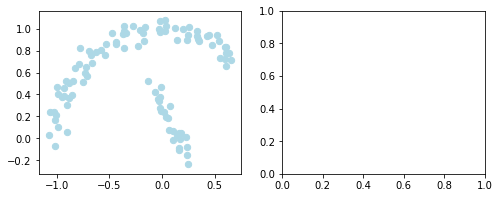

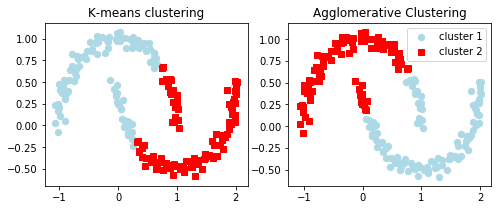

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km==0,0], x[y_km==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km==1,0], x[y_km==1,1], c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac==0,0], x[y_ac==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac==1,0], x[y_ac==1,1], c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative Clustering')
plt.legend()
plt.show()

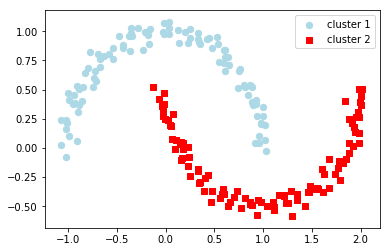

In [42]:
# now DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(x)

plt.scatter(x[y_db==0,0], x[y_db==0,1], c='lightblue', marker='o', s=40, label='cluster 1')

plt.scatter(x[y_db==1,0], x[y_db==1,1], c='red', marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()